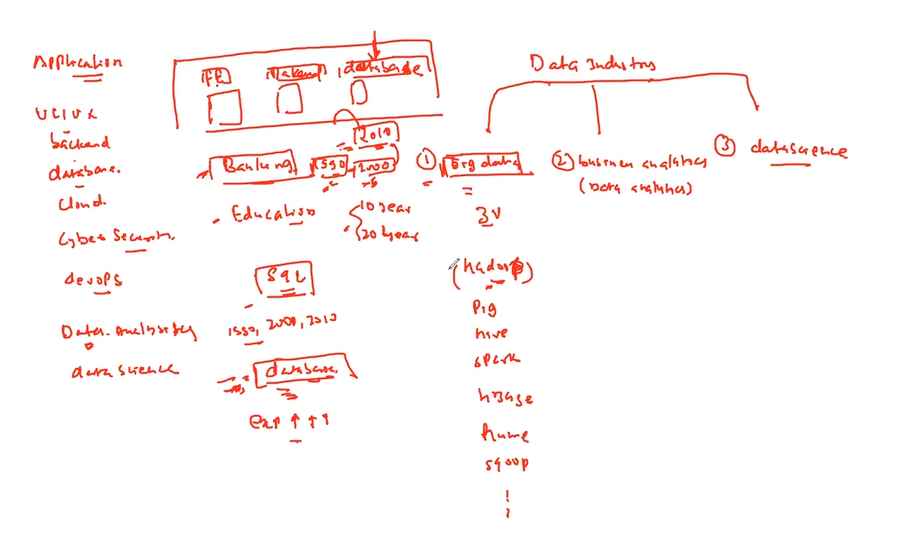

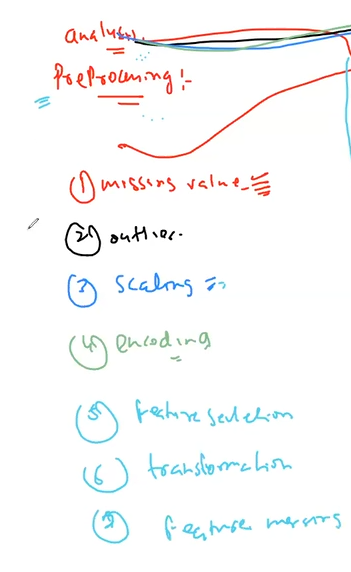

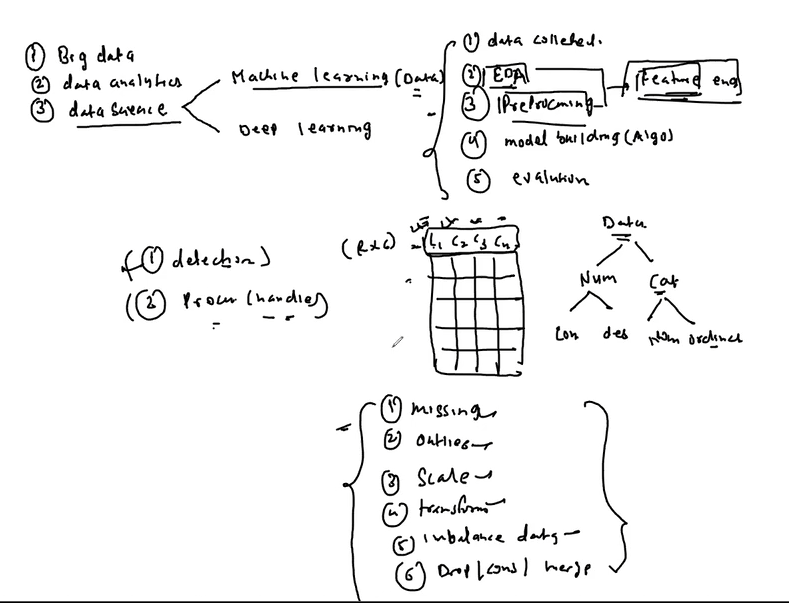

### Handling missing value

Missing value in a dataset is a very common phenomenon in reality. For various reasons, many real world datasets contain missing values, often encoded as blanks, NaNs or other placeholders.Values could be missing for many reasons, often specific to the problem domain, and might include reasons such as corrupt measurements or data unavailability.

Missing value correction is required to reduce bias and to produce powerful suitable models. Most of the algorithms can’t handle missing data, thus you need to act in some way to simply not let your code crash

There are four qualitatively distinct types of missing data. Missing data is either: structurally missing, missing completely at random (MCAR), missing at random, or nonignorable (also known as missing not at random). Different types of missing data need to be treated differently in order for any analysis to be meaningful.

### Structurally missing data

Structurally missing data is data that is missing for a logical reason. In other words, it is data that is missing because it should not exist. In the table below, the first and third observations have missing values for Age of youngest child. This is because these people have no children. In the How many colas did you drink in the past 24 hours column, there are also structurally missing values. In this case, we can logically deduce that the correct value is 0, so this value should be used in place of the missing values in our analysis.
 
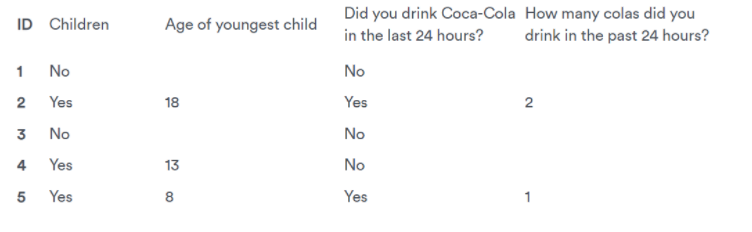


### Missing completely at random (MCAR)

Looking at the table below, we need to ask ourselves: what is the likely income of the fourth observation? The simplest approach is to note that 50% of the other people have high incomes and 50% have low incomes. We could assume, therefore, that there is a 50% chance she has a high income and a 50% chance she has a low income. This is known as assuming that the missing value is missing completely at random (MCAR). When we make this assumption, we are assuming that whether or not the person has missing data is completely unrelated to the other information in the data.

### Missing at random (MAR)

In the case of missing completely at random, the assumption was that there was no pattern. An alternative assumption, known somewhat confusingly as missing at random (MAR) instead assumes that we can predict the value that is missing based on the other data.We use this assumption to return to the problem of trying to work out the value of the fourth observation on income. A simple predictive model is that income can be predicted based on gender and age. Looking at the table below, which is the same as the one above, we note that our missing value is for a Female aged 30 or more, and the other females aged 30 or more have a High income. As a result, we can predict that the missing value should be High. Note that the idea of prediction does not mean we can perfectly predict a relationship. All that is required is a probabilistic relationship (i.e., that we have a better than random probability of predicting the true value of the missing data).
When data is missing at random, it means that we need to either use an advanced imputation method, such as multiple imputation, or an analysis method specifically designed for missing at random data.

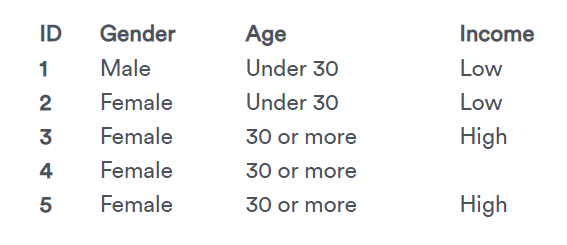

### Missing not at random (nonignorable)

It may be the case that we cannot confidently make any conclusions about the likely value of missing data. For example, it is possible that people with very low incomes and very high incomes tend to refuse to answer. Or there could be some other reason we just do not know. This is known as missing not at random data and also as nonignorable missing data.
It is common to include structural missing data as a special case of data that is missing not at random. However, this misses an important distinction. Structurally missing data is easy to analyze, whereas other forms of missing not at random data are highly problematic.
When data is missing, not at random, it means that we cannot use any of the standard methods for dealing with missing data (e.g., imputation, or algorithms specifically designed for missing values). If the missing data is missing, not at random, any standard calculations give the wrong answer

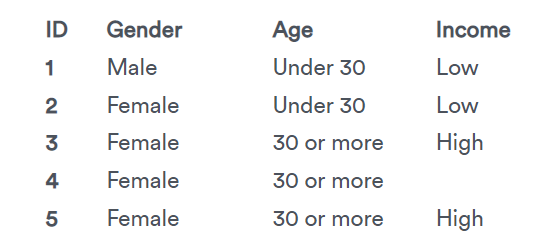


# Missing Values

### Visualization
* matrix
* barchar
* heatmaps

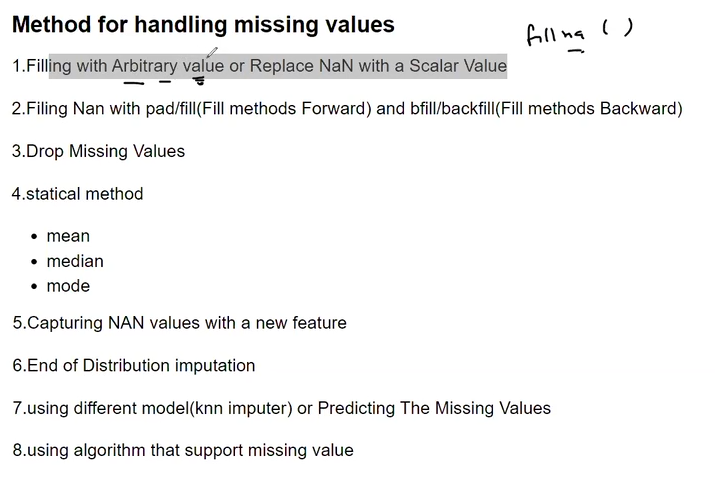

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import pymongo
import json
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline

In [10]:
df_default=pd.read_csv("D:\\lh_data\\ineuron\\HomeCreditDefault\\Home_Credit_Default_Risk1.csv")
df_titanic=pd.read_csv("D:\\lh_data\\ineuron\\HomeCreditDefault\\titanic.csv")


In [11]:
df_default

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0         333185       0    Revolving loans           F            N   
1         293761       0         Cash loans           F            Y   
2         192407       0         Cash loans           F            N   
3         203675       0         Cash loans           F            Y   
4         428596       0         Cash loans           M            Y   
...          ...     ...                ...         ...          ...   
9995      222903       0         Cash loans           M            Y   
9996      412902       0         Cash loans           F            Y   
9997      410430       0         Cash loans           F            N   
9998      338832       0         Cash loans           M            Y   
9999      111979       0         Cash loans           F            N   

     FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                  Y             0          112500.0    202500.0      10125.0   
1                  N             0          157500.0    261288.0      12838.5   
2                  Y             0           90000.0    508495.5      22527.0   
3                  N             0          121500.0    225000.0      17905.5   
4                  N             1          382500.0    463500.0      22428.0   
...              ...           ...               ...         ...          ...   
9995               Y             2          157500.0    450000.0      17095.5   
9996               Y             1          225000.0    755190.0      36459.0   
9997               N             0          157500.0   1042560.0      40702.5   
9998               N             0          360000.0   1436850.0      46480.5   
9999               Y             1          270000.0    957033.0      53568.0   

      ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
0     ...                 0                0                0   
1     ...                 0                0                0   
2     ...                 0                0                0   
3     ...                 0                0                0   
4     ...                 0                0                0   
...   ...               ...              ...              ...   
9995  ...                 0                0                0   
9996  ...                 0                0                0   
9997  ...                 0                0                0   
9998  ...                 0                0                0   
9999  ...                 0                0                0   

     FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                   0                        NaN                       NaN   
1                   0                        0.0                       0.0   
2                   0                        0.0                       0.0   
3                   0                        0.0                       0.0   
4                   0                        0.0                       0.0   
...               ...                        ...                       ...   
9995                0                        0.0                       0.0   
9996                0                        0.0                       0.0   
9997                0                        0.0                       0.0   
9998                0                        0.0                       0.0   
9999                0                        0.0                       0.0   

      AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                            NaN                        NaN   
1                            0.0                        1.0   
2                            0.0                        0.0   
3                            0.0                        1.0   
4                            0.0                        0.0   
...                          ...                        ...   
9995     

In [12]:
df_titanic

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [13]:
df_default.isnull().sum()

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     1357
AMT_REQ_CREDIT_BUREAU_WEEK    1357
AMT_REQ_CREDIT_BUREAU_MON     1357
AMT_REQ_CREDIT_BUREAU_QRT     1357
AMT_REQ_CREDIT_BUREAU_YEAR    1357
Length: 122, dtype: int64

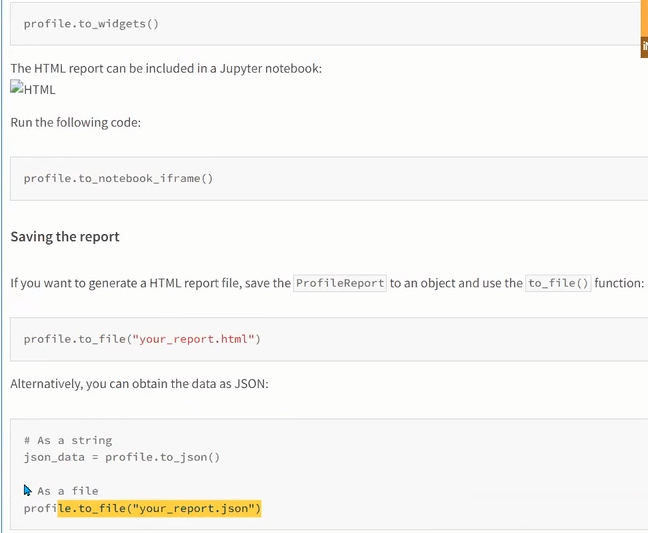

In [16]:
profile = ProfileReport(df_titanic, title="Titanic Profiling Report")


In [18]:
#profile.to_widgets()
profile.to_notebook_iframe()

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [30]:
missing_values_sum = df_titanic.isnull().sum()
print(missing_values_sum )
missing_values_percent = df_titanic.isnull().mean()*100
print(missing_values_percent )

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [21]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

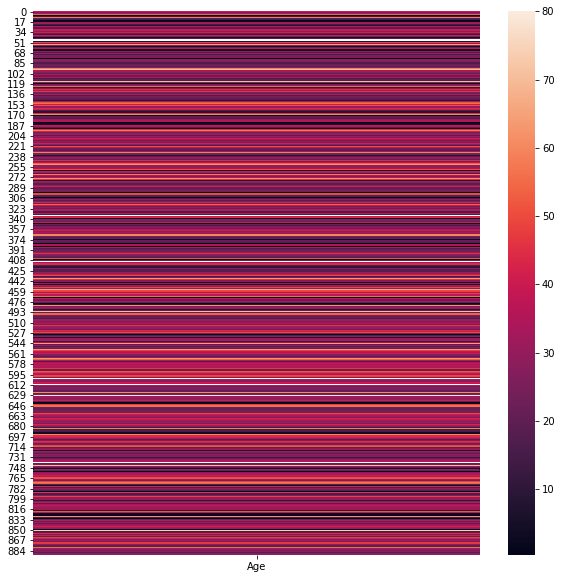

In [24]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(pd.DataFrame(df_titanic["Age"]))  # zero means missing values

In [25]:
# https://github.com/ResidentMario/missingno
# https://www.youtube.com/watch?v=Wdvwer7h-8w

import missingno as msno  # library to analysis the missing values

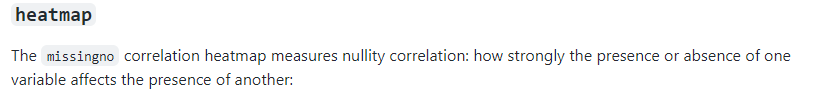

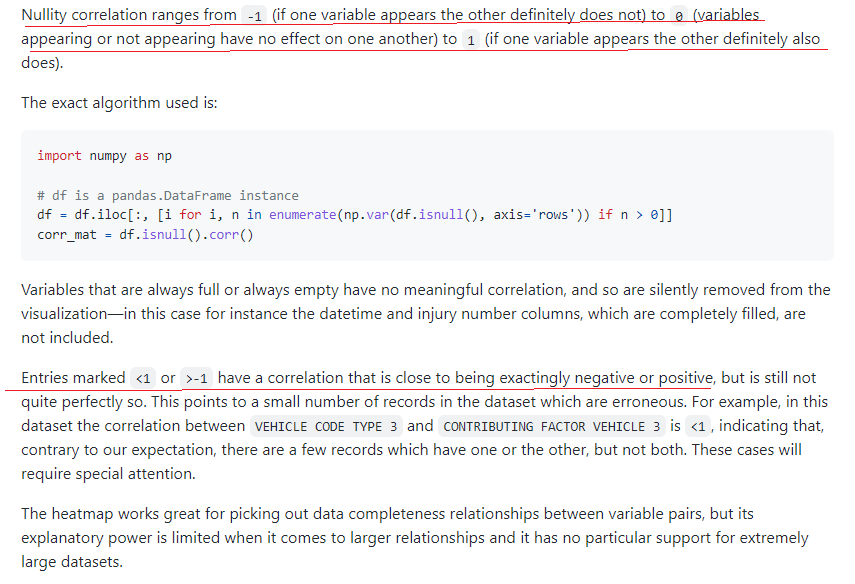

### displays only the features with missing values
* +1 indicates that the presence of no values in one column is positive correlated with the presence of no values in other columns
* 0 indicates there is not relationship in the nulity between the columns
* -1 indicates that the presence of no values in one columns correlates with the presence of values in another column and viceversa

<AxesSubplot:>

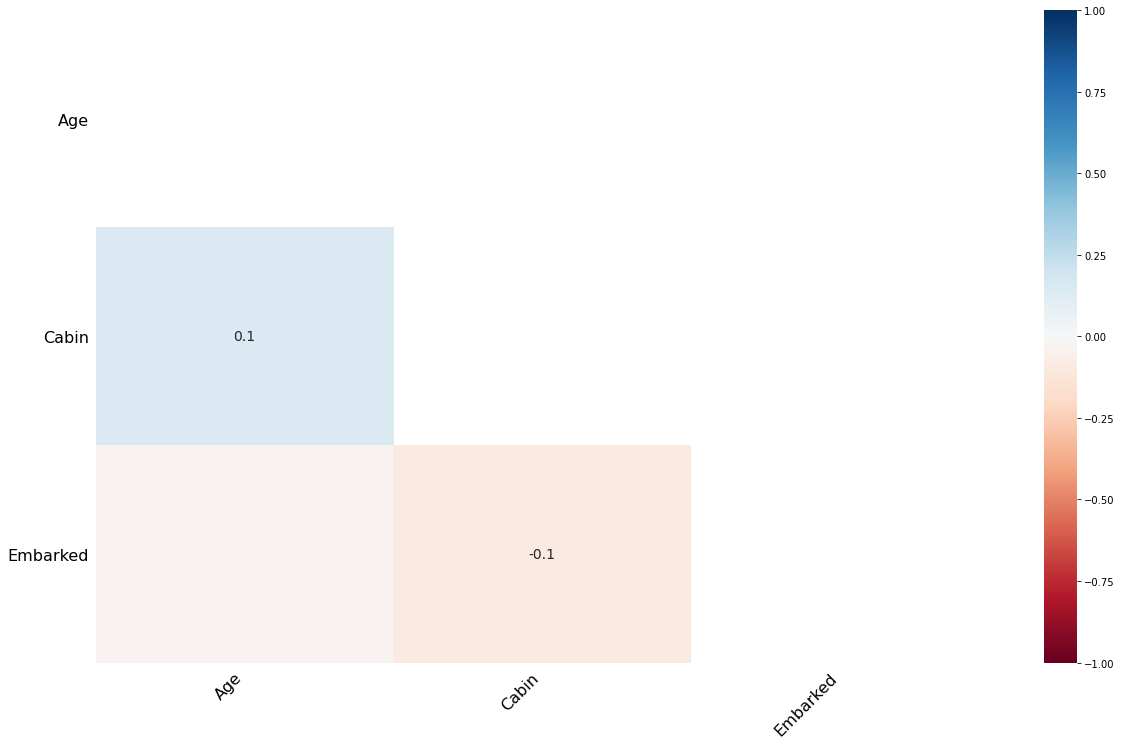

In [26]:
msno.heatmap(df_titanic)  # displays onle the features with missing values

<AxesSubplot:>

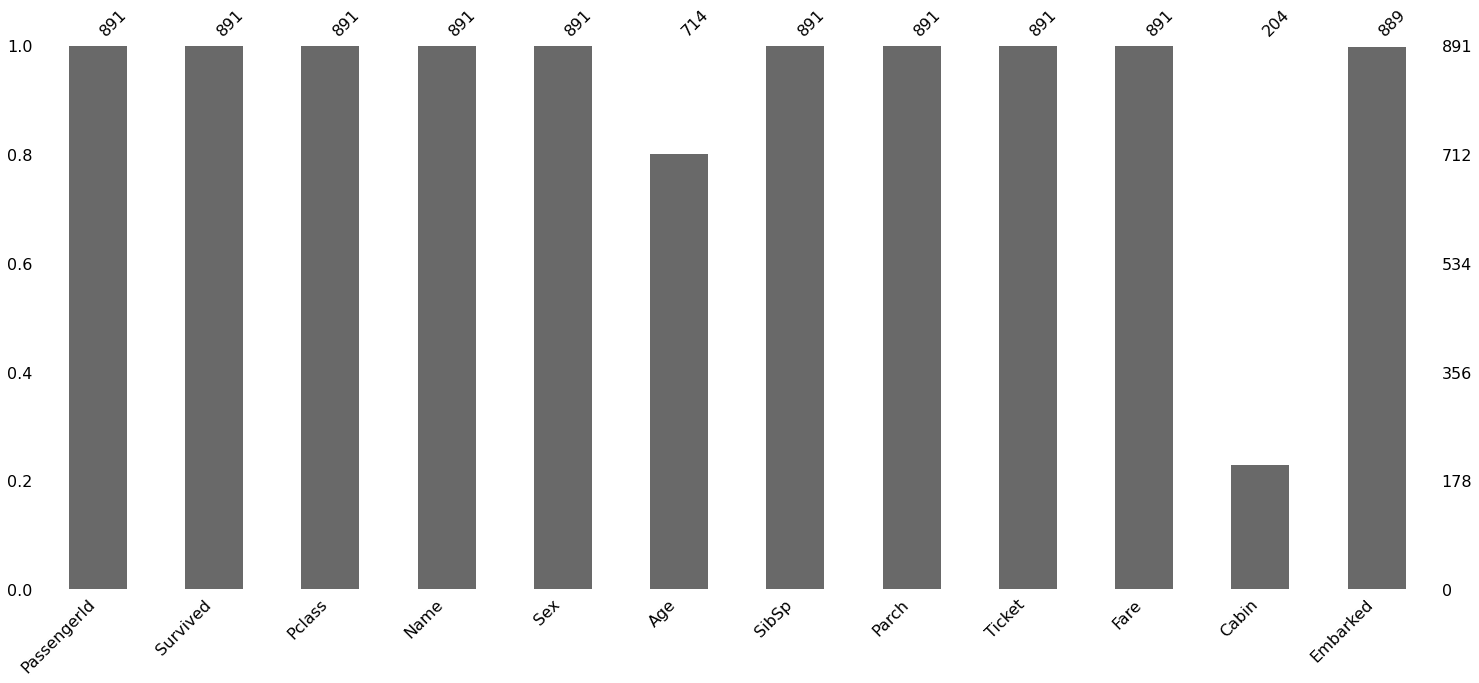

In [35]:
msno.bar(df_titanic)  # shows missing values, the number in the top is the number of value occurencies in the dataset

<AxesSubplot:>

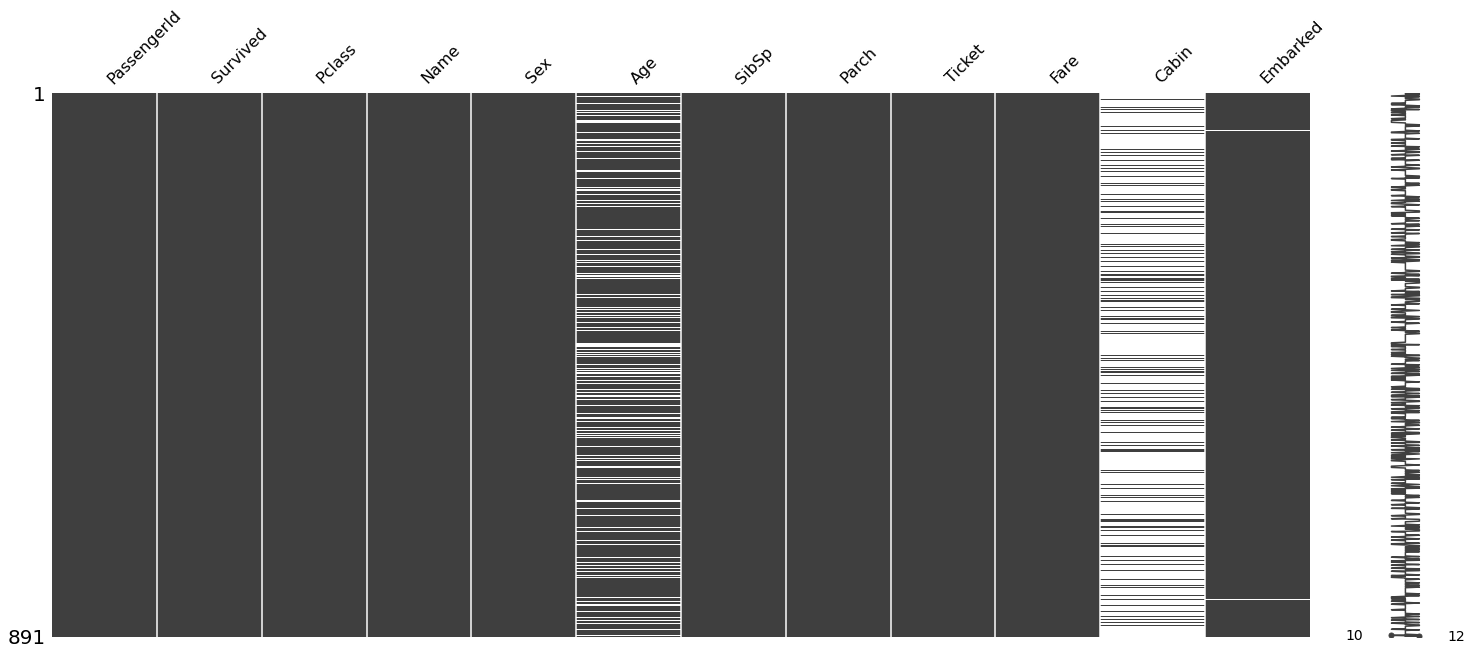

In [36]:
msno.matrix(df_titanic) # right columns goes from min/max columns with data and shows the integrity of the horizontally(data row by row)

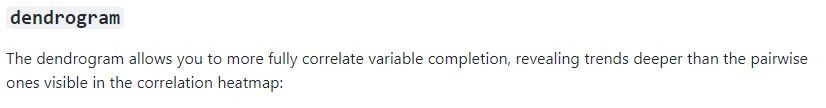

<AxesSubplot:>

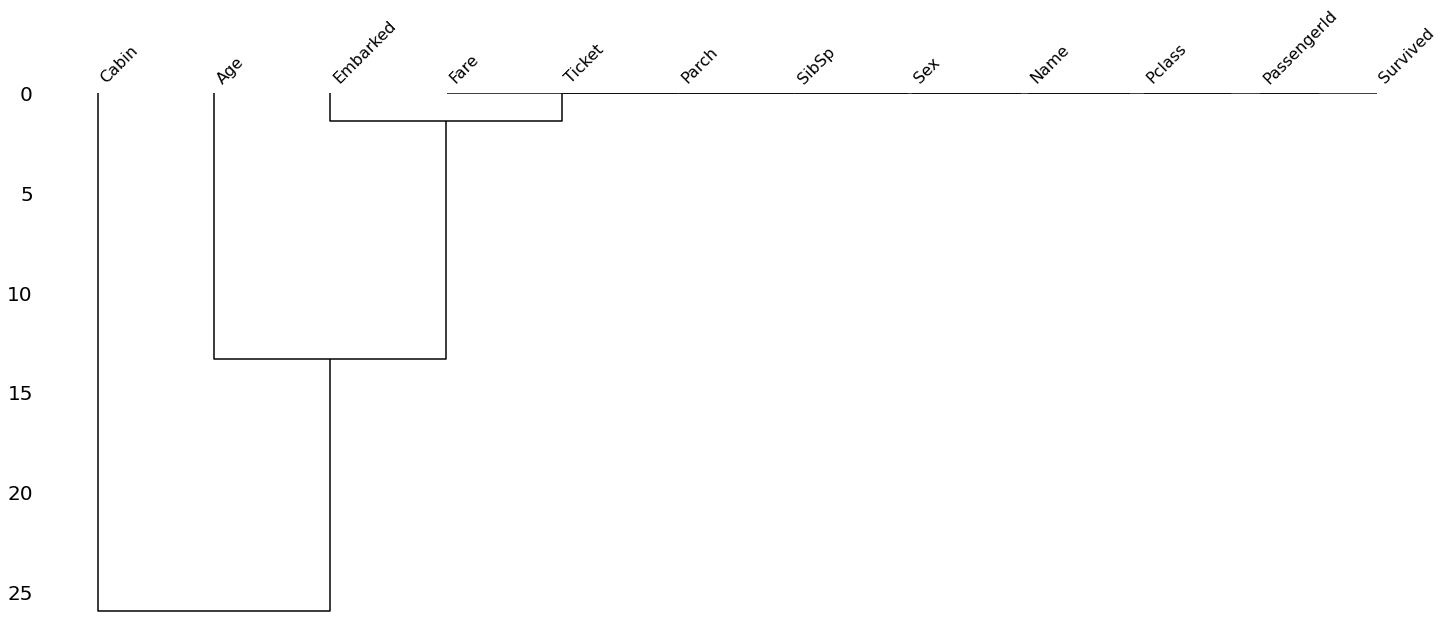

In [39]:
msno.dendrogram(df_titanic)  # allows you to more fully correlate variable completion.

# filling with arbitrary value or replace NAN with a scalar value

In [41]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [42]:
def impute_nan(data,variable):
    data[variable+"_0"]=data[variable].fillna(0)
    data[variable+"_100"]=data[variable].fillna(100)
    
impute_nan(df_titanic,"Age")
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_0            0
Age_100          0
dtype: int64

In [48]:
df_titanic[["Age","Age_0","Age_100"]].head(6)

Age  Age_0  Age_100
0  22.0   22.0     22.0
1  38.0   38.0     38.0
2  26.0   26.0     26.0
3  35.0   35.0     35.0
4  35.0   35.0     35.0
5   NaN    0.0    100.0